## This notebook is to compare the relative abundances of various phyla across samples and treatments

## It is used to produce supplemental figures 1 and 2

In [1]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)


Attaching package: ‘plyr’

The following objects are masked from ‘package:reshape’:

    rename, round_any


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:reshape’:

    rename

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘plotly’

The following objects are masked from ‘package:plyr’:

    arrange, mutate, rename, summarise

The following object is masked from ‘package:ggplot2’:

    last_plot

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:stats’:

    filter

The following object is masked from ‘package:graphics’:

    layout



In [2]:
# Import and normalize data
ps = readRDS("../../../data/Seq_data/16S/CHTC/Dada2_Results_Full/ps.merged")
ps.norm = transform_sample_counts(ps, function(x) x/sum(x))

In [3]:
mdf = psmelt(ps.norm)

In [4]:
# Adding up abundances for each phylum, by each sample

df = mdf%>%
    group_by(Land_Class,Org_or_Min,Severity_Class,Sample,Phylum,Veg_Comm)%>%
    summarize(Abundance=sum(Abundance))%>%
    mutate(SeveritySoil = paste(Org_or_Min,Severity_Class))
df$SeveritySoil = ordered(df$SeveritySoil,c("O Unburned","O Low","O Moderate","O High","M Unburned","M Low","M Moderate","M High"))

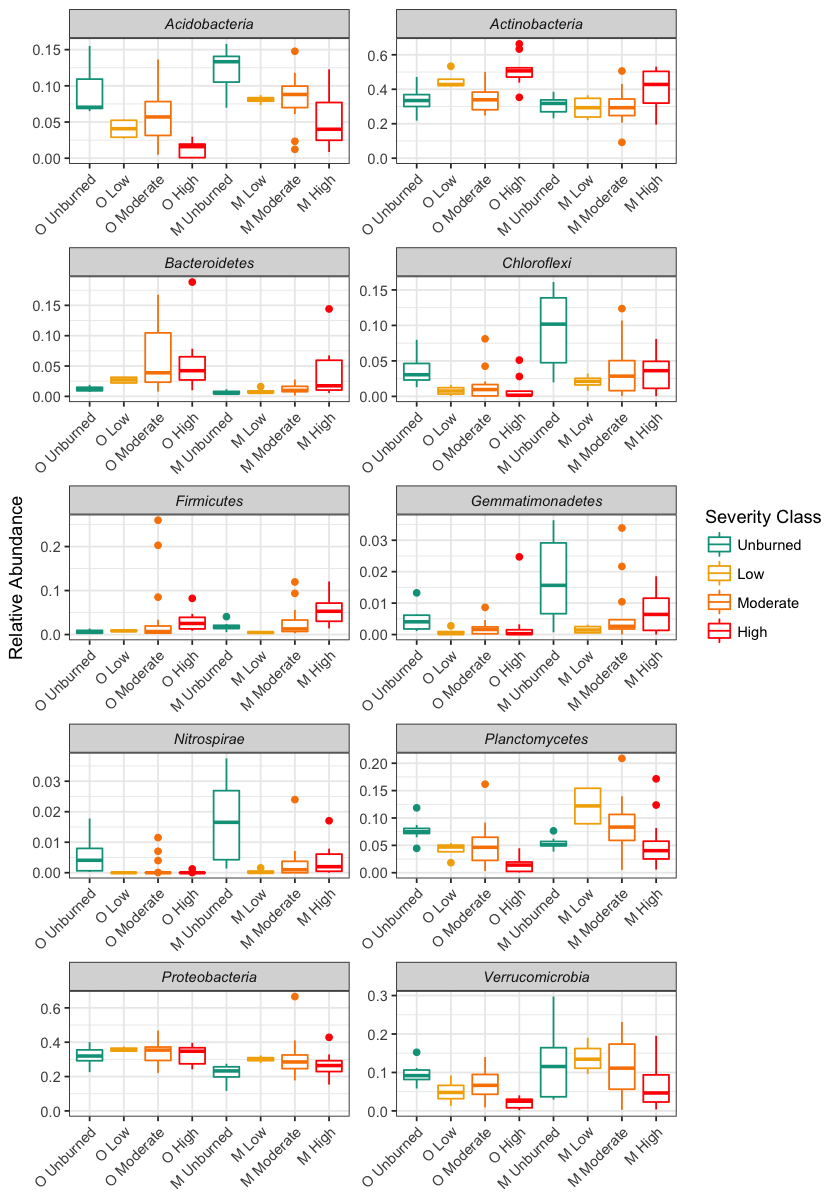

In [8]:
options(repr.plot.width=7, repr.plot.height=10)

# Designating phyla of interest
#MajPhy = c("Verrucomicrobia", "Proteobacteria", "Planctomycetes", "Nitrospirae", "Gemmatimonadetes", "Firmicutes","Chloroflexi", "Bacteroidetes", "Armatimonadetes", "Actinobacteria", "Acidobacteria")
MajPhy = c("Verrucomicrobia","Bacteroidetes", "Proteobacteria", "Planctomycetes", "Nitrospirae", "Gemmatimonadetes", "Firmicutes","Chloroflexi", "Bacteroidetes", "Actinobacteria", "Acidobacteria")

# Selecting only those phyla
d = df %>% filter(Land_Class=="Upland")%>%
    filter(Phylum %in% MajPhy)


p = ggplot(data=d, aes(x=SeveritySoil,y=Abundance,color=Severity_Class))
p = p + geom_boxplot()
p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle=45,hjust=1),
              strip.text.x = element_text(face="italic"),
             axis.title.x = element_blank())
p = p + ylab("Relative Abundance")
palette = c(wes_palette("Darjeeling"),wes_palette("Darjeeling2")[2:4])
palette = palette[c(2,3,4,1,5,6)]
p = p + scale_color_manual(values=palette)
p = p + facet_wrap(~Phylum, scales="free", ncol=2) + expand_limits(y=0)
p = p + guides(colour=guide_legend(title="Severity Class"))
p

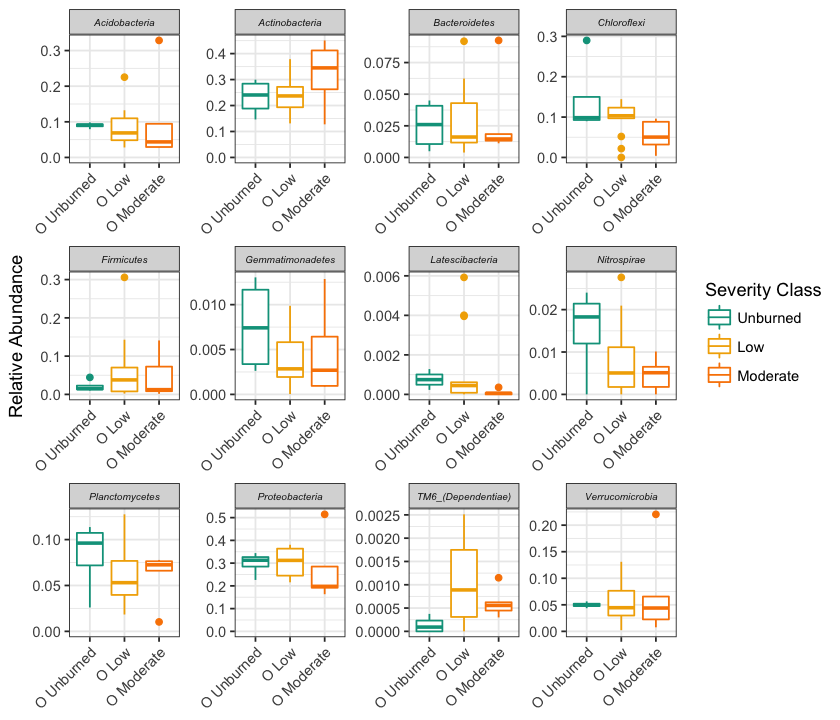

In [7]:
options(repr.plot.width=7, repr.plot.height=6)

MajPhy = c("Verrucomicrobia", "TM6_(Dependentiae)","Proteobacteria", "Planctomycetes", "Nitrospirae","Latescibacteria", "Gemmatimonadetes", "Firmicutes","Chloroflexi", "Bacteroidetes", "Actinobacteria", "Acidobacteria")

d = df %>% filter(Land_Class=="Wetland" & Org_or_Min=="O")%>%
    filter(Phylum %in% MajPhy)

p = ggplot(data=d, aes(x=SeveritySoil,y=Abundance,color=Severity_Class))
p = p + geom_boxplot()
p = p + theme_bw()
p = p + theme(axis.text.x = element_text(angle=45,hjust=1),
              strip.text.x = element_text(face="italic", size=6),
             axis.title.x = element_blank())
p = p + ylab("Relative Abundance")
palette = c(wes_palette("Darjeeling"),wes_palette("Darjeeling2")[2:4])
palette = palette[c(2,3,4,1,5,6)]
p = p + scale_color_manual(values=palette)
p = p + facet_wrap(~Phylum, scales="free", ncol=4) + expand_limits(y=0)
p = p + guides(colour=guide_legend(title="Severity Class"))
p